# Небольшое задание на метод главных компонент

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

Загрузим картинку и нарисуем ее.

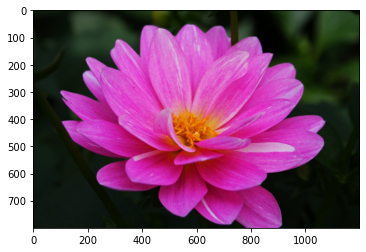

In [5]:
img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [6]:
img.shape

(800, 1200, 3)

Разобъем изображение на цветовые каналы.

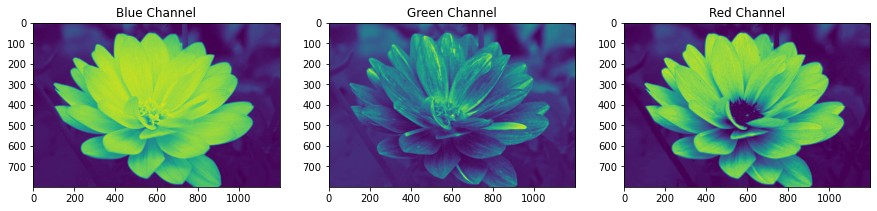

In [7]:
blue,green,red = cv2.split(img)

fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

Посмотрим на матрицу одного из каналов.

In [8]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,10,10,10,10,10,11,11,11,11,11,...,9,9,9,9,9,9,9,9,9,9
1,10,10,10,10,10,11,11,11,11,11,...,9,9,9,9,9,9,9,9,9,9
2,10,10,10,10,10,11,11,11,11,11,...,7,7,7,7,7,7,7,7,7,7
3,10,10,10,10,10,11,11,11,11,11,...,7,7,6,6,6,6,6,6,6,6
4,10,10,10,10,10,11,11,11,11,11,...,7,7,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,12,12,12,12,12,12,12,12,13,13,...,7,7,7,7,7,7,7,7,7,7
796,12,12,12,12,12,12,12,12,13,13,...,7,7,7,7,7,7,7,7,7,7
797,13,13,13,13,13,13,13,13,13,13,...,7,7,7,7,7,7,7,7,7,7
798,13,13,13,13,13,13,13,13,13,13,...,7,7,7,7,7,7,7,7,7,7


### Сейчас будем делать PCA

Масштабируем данные, поделив значения в таблицах каждого канала на 255

In [9]:
blue, green, red = blue / 255, green / 255, red / 255

Обучаем PCA с 50-ю компонентами на каждом канале в отдельности (три раза обучаем). Снизим размерность каждого канала в отдельности.

In [10]:
pca_blue = PCA(n_components=50)
fit_blue = pca_blue.fit_transform(blue)

pca_green = PCA(n_components=50)
fit_green = pca_green.fit_transform(green)

pca_red = PCA(n_components=50)
fit_red = pca_red.fit_transform(red)

Ищем долю дисперсии, объясняемой первыми 50-ю главными компонентами (для каждого канала в отдельности).

In [11]:
b_evr = pca_blue.explained_variance_ratio_
g_evr = pca_green.explained_variance_ratio_
r_evr = pca_red.explained_variance_ratio_

print(f"Blue channel:  explained variance ratio = {sum(b_evr):.6f}")
print(f"Green channel: explained variance ratio = {sum(g_evr):.6f}")
print(f"Red channel:   explained variance ratio = {sum(r_evr):.6f}")

Blue channel:  explained variance ratio = 0.992638
Green channel: explained variance ratio = 0.974588
Red channel:   explained variance ratio = 0.991248


Гистограммы с долей дисперсии, объясняемой каждой из первых 50-ти компонент по 3-м каналам.

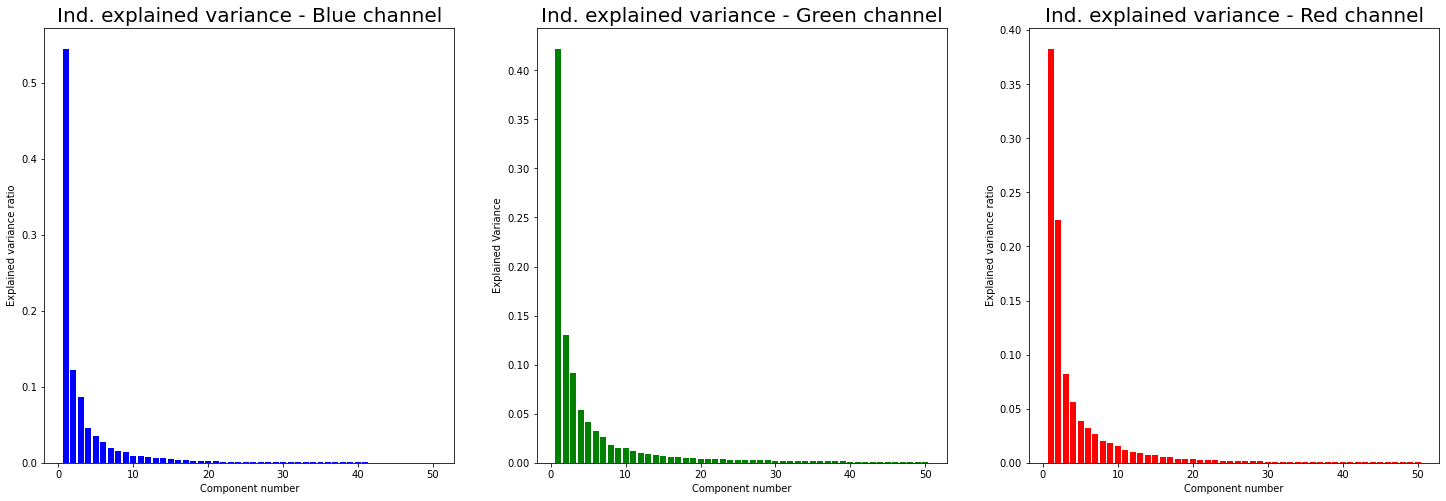

In [12]:
fig = plt.figure(figsize = (25, 8)) 

fig.add_subplot(131)
plt.title('Ind. explained variance - Blue channel', fontsize=20)
plt.bar(range(1,len(b_evr)+1), b_evr, color='blue')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component number')

fig.add_subplot(132)
plt.title('Ind. explained variance - Green channel', fontsize=20)
plt.bar(range(1,len(g_evr)+1), g_evr, color='green')
plt.ylabel('Explained Variance')
plt.xlabel('Component number')

fig.add_subplot(133)
plt.title('Ind. explained variance - Red channel', fontsize=20)
plt.bar(range(1,len(r_evr)+1), r_evr, color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component number')

plt.show()

### Восстанавливаем изображение

In [13]:
b_restored = pca_blue.inverse_transform(fit_blue)
g_restored = pca_green.inverse_transform(fit_green)
r_restored = pca_red.inverse_transform(fit_red)

Склейка восстановленных одноканальных изображений в цветное трехканальное изображение. На выходе -  сжатое изображение

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


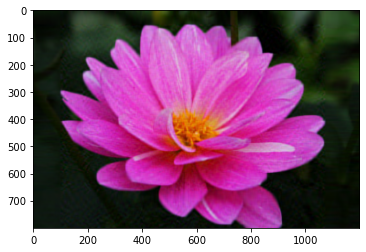

In [14]:
restored_img = cv2.merge((b_restored, g_restored,  r_restored))
plt.imshow(restored_img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


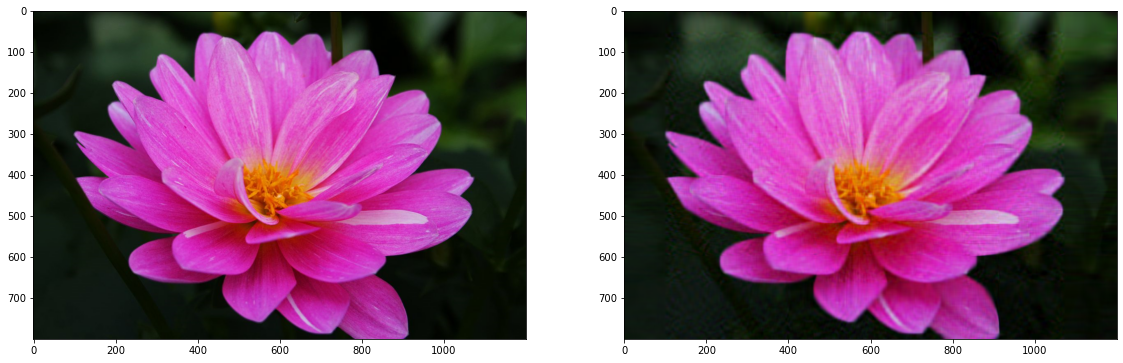

In [15]:
fig = plt.figure(figsize = (30, 7.2)) 

fig.add_subplot(131)
plt.imshow(img)

fig.add_subplot(132)
plt.imshow(restored_img)

plt.show()

*Визуально качество картинки немного упало, немного снизились краски изображения, детали стали не такими четкими, изображение стало немного более мутное*

* Если задача состояла в передаче сжатой информации, что на картинке розовый цветок, то она выполнена и PCA с 50-ю компонентами может использоваться для снижения размерности;
* Однако если задача состоит в передаче качества, яркости, цветов изображения, то, на мой взгляд, PCA с 50 компонентами не подходит для выполнения задачи

Подбор минимального количества компонент, при которых сжатое изображение визуально не отличается от исходного

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


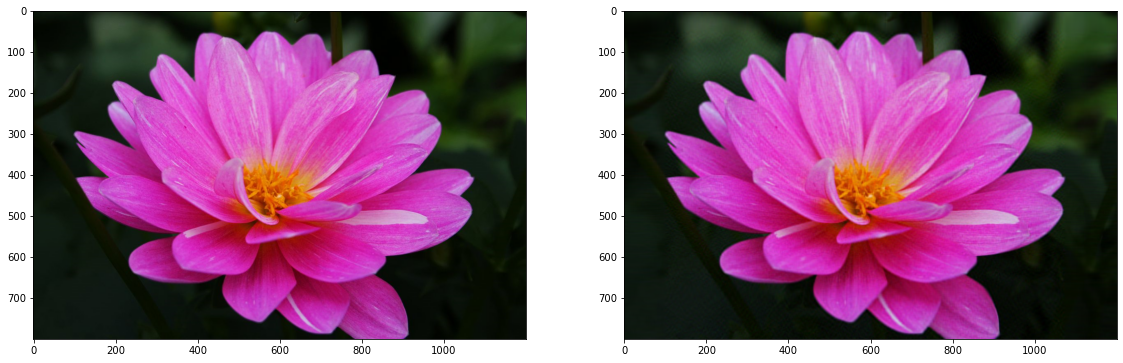

In [16]:
pca_blue = PCA(n_components=100)
fit_blue = pca_blue.fit_transform(blue)

pca_green = PCA(n_components=100)
fit_green = pca_green.fit_transform(green)

pca_red = PCA(n_components=100)
fit_red = pca_red.fit_transform(red)

b_restored = pca_blue.inverse_transform(fit_blue)
g_restored = pca_green.inverse_transform(fit_green)
r_restored = pca_red.inverse_transform(fit_red)

restored_img = cv2.merge((b_restored, g_restored, r_restored))

fig = plt.figure(figsize = (30, 7.2)) 

fig.add_subplot(131)
plt.imshow(img)

fig.add_subplot(132)
plt.imshow(restored_img)

plt.show()

Итог: 100 компонент